<a href="https://colab.research.google.com/github/LanguageExchanger/BasicStatistics/blob/main/Quest_04_%ED%86%B5%EA%B3%84_%EA%B8%B0%EC%B4%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 통계문제

## 문제1

* 빵집에서는 매일 아침에 구워지는 식빵 한 개의 평균 무게가 500g이 되도록 맞추고자 합니다. 빵집 주인은 오늘 아침에 구운 식빵 중에서 랜덤하게 25개의 식빵을 샘플링하여 무게를 측정했습니다. 그 결과, 표본 평균은 495g, 표준편차는 10g으로 나왔습니다. 빵집 주인이 목표한 500g의 무게를 충족하고 있는지(다시말해 목표 무게를 넘는지 안 넘는지)  5% 유의수준에서 검정해보세요

In [90]:
import scipy.stats as stats
import numpy as np

#기초통계 변수 설정
mu = 500

size = 25
x_bar = 495
s = 10
df = size - 1 #자유도
alpha = 0.05 # 유의수준 = 1 - 신뢰구간

confidence_interval = stats.t.interval(alpha, df = df, loc = x_bar, scale = s / np.sqrt(size))

# 귀무가설:빵집 주인이 목표한 500g 무게를 충족한다.
# 대립가설:빵집 주인이 목표한 500g 무게를 충족하지 않는다.
if (x_bar < confidence_interval[0]) & (x_bar > confidence_interval[1]):
    print("귀무가설 기각: 빵집 주인이 목표한 500g 무게를 충족하지 않는다.")
else:
    print("귀무가설 채택: 빵집 주인이 목표한 500g 무게를 충족한다.")

귀무가설 채택: 빵집 주인이 목표한 500g 무게를 충족한다.


In [84]:
confidence_interval

(np.float64(493.63030074552603), np.float64(496.36969925447397))

## 문제2) 분포 시각화

문제 1번을 바탕으로 분포를 그리고 t통계량을 빨간색 점선으로, 초록색 점선으로 임계값을 기각역을 초록색으로 칠해보세요.

***기각역**:  통계량이 들어왔을 경우 귀무가설을 기각할 수 있는 영역을 말합니다.

 Hint)

- `plt.axvline` : y축 평행선 그리기
- `plt.fill_between` : 그래프 면적 색칠하기

<ipython-input-91-c49659f6c18a>:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


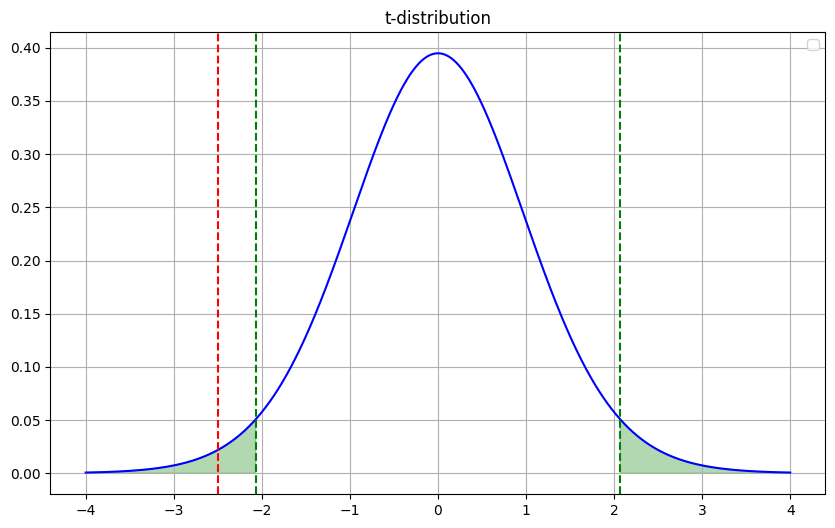

In [91]:
import matplotlib.pyplot as plt

# 그래프용 x 값
x = np.linspace(start = -4, stop = 4, num = 1000)
t_dist = stats.t(df, loc = 0, scale = 1) #t분포 그리기
y = t_dist.pdf(x)

# t-통계량
t_score = (x_bar - mu) / (s / np.sqrt(size))

# 임계값 계산 (양쪽 기준)
t_critical = stats.t.ppf(1 - alpha / 2, df)

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(x, y, color='blue')
plt.fill_between(x, 0, y, where=np.abs(x) > t_critical, color='green', alpha=0.3)
plt.axvline(t_score, color='red', linestyle='--')
plt.axvline(-t_critical, color='green', linestyle='--')
plt.axvline(t_critical, color='green', linestyle='--')
plt.title('t-distribution')
plt.legend()
plt.grid(True)
plt.show()

## 문제 3) 단일 t 표본 검정

* 어느 학교에서 새로운 교육 프로그램을 도입한 후 학생들의 수학 성적이 향상되었는지 확인하려고 합니다. 프로그램 도입 후 무작위로 선택한 16명의 학생들의 수학 성적 평균은 78점이고, 모집단의 평균은 75점입니다. 모집단의 표준편차는 알 수 없다고 합니다.
- 유의수준 0.05에서 이 교육 프로그램이 성적 향상에 효과가 있는지 단일 표본 t-검정을 실시하세요.

<aside>
💡 수업시간에 양측검정을 기준으로 배웠습니다. 다시말하면 데이터의 평균이 특정 값과 같은지 아닌지(방향은 관심없음)입니다. 문제는 **향상에 효과가 있는지** 에 대한 물음입니다. 함수를 무엇을 어떻게 넣어야할지 고민해보세요!(힌트 scipy docs 참고)

</aside>

In [42]:
sample_scores = [79, 77, 80, 76, 78, 81, 75, 79, 77, 80, 78, 76, 82, 77, 79, 78]  # 예시 데이터

mean = 78
mu = 75
alpha = 0.05

t_stat, p_value = stats.ttest_1samp(sample_scores, mu, alternative='greater')

# 결과 출력
if p_value < alpha:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 교육프로그램은 효과가 있습니다.")
else:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 교육프로그램은 효과가 없습니다")

t-값: 6.7890, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 교육프로그램은 효과가 있습니다.


## 문제 4) 독립 표본 t 검정

- 한 연구소에서 두 가지 새로운 다이어트 프로그램의 효과를 비교하려고 합니다. 연구소는 두 그룹의 참가자들을 대상으로 12주간 다이어트 프로그램을 진행한 후 체중 감소량을 측정했습니다.
- 유의수준 5% 에서 두 그룹 간 평균 체중 감소량에 유의미한 차이가 있는지 독립 표본 t-검정을 실시하세요.

<aside>
💡

관찰연구에서는  두개의 그룹을 t검정을 할때 등분산성을 검정하게 됩니다.  `scipy.stats.levene` 문서를 읽고 등분산 검정 후 적절한 검정방법을 적용해보세요. 등분산 검정에도 역시 귀무가설과 대립가설이 존재합니다.

</aside>

In [75]:
# 그룹 A와 B의 체중 감소량 데이터
group_A = [5.1, 4.7, 6.2, 4.9, 5.3, 6.1, 5.0, 5.8, 4.8, 5.2]
group_B = [4.3, 4.1, 3.8, 4.6, 4.0, 4.5, 3.7, 4.2, 3.9, 4.4, 3.5, 4.3]
alpha = 0.05 # 유의수준 정의

# 그룹 간의 등분산성 검정
# 귀무가설:샘플들이 모두 분산이 동일한 모집단으로 왔다. > 등분산이다
# 대립가설:샘플들이 분산이 다른 모집단으로 왔다. > 등분산이 아니다.
levene_stat, levene_p = stats.levene(group_A, group_B)
print(f"levene통계량: {levene_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 샘플A와 샘플B는 등분산성을 지닙니다.")

# T-test
t_stat, p_value = stats.ttest_ind(group_A, group_B, equal_var=True) #그룹 간 등분산성을 만족할 시 equal_var=True

# # 결과 출력
if p_value < alpha:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 다이어트 프로그램은 효과가 있습니다.")
else:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 다이어트 프로그램은 효과가 없습니다")

levene통계량: 1.2856, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 채택합니다. 샘플A와 샘플B는 등분산성을 지닙니다.
t-값: 6.3898, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 다이어트 프로그램은 효과가 있습니다.


## 문제 5) 대응표본 t검정

- 운동 프로그램 전후의 체중 변화를 분석하기 위해 10명의 참가자의 체중을 측정했습니다. 유의수준 5%에서 운동 프로그램이 체중 감소에 효과가 있는지 **대응 표본 t-검정**을 실시하세요.
- 또한, 대응표본t검정에서 등분산 검정이 필요한지 고민해봅시다.

In [93]:
# 운동 전후 체중 데이터
before = np.array([70, 80, 65, 90, 75, 85, 78, 82, 68, 73])
after = np.array([68, 78, 64, 88, 74, 83, 77, 80, 67, 72])
alpha = 0.05 # 유의수준

#대응표본 t 검정
t_stat, p_value = stats.ttest_rel(before, after)

# 결과 출력
if p_value < alpha:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 고혈압약은 효과가 있습니다.")
else:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 고혈압약은 효과가 없습니다.")

t-값: 9.0000, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 고혈압약은 효과가 있습니다.


독립표본 t-검정 수행 시에는 다른 샘플 그룹 간의 차이를 비교하기 때문 등분산성 검정이 필요하지만, 대응표본 t-검정은 동일한 샘플 그룹을 2번 측정한 것이기 때문에 등분산성 검정이 필요하지 않습니다.

## 문제 6) 표본 추출

- Quest 05-01의  Online Retail II 데이터에서 표본을 추출하여 모집단의 평균을 추정해보세요.
- 영국(United Kingdom)에서 주문된 데이터 에서 30개, 100개, 300개의 샘플을 무작위 추출하여 평균 구매 금액(Total Price)를 계산해보세요. 표본의 크기가 커질 수록 모집단의 평균과 가까워지는지 확인해보세요.
- 데이터 불러오는 코드

In [36]:
import kagglehub
import os
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("mashlyn/online-retail-ii-uci")
print("Path to dataset files:", path)
retail = pd.read_csv(path + '/' + os.listdir(path)[0])


'''
Sample size: 30, Mean TotalPrice: 11.45
Sample size: 100, Mean TotalPrice: 25.33
Sample size: 300, Mean TotalPrice: 19.49
'''

Path to dataset files: /kaggle/input/online-retail-ii-uci


'\nSample size: 30, Mean TotalPrice: 11.45\nSample size: 100, Mean TotalPrice: 25.33\nSample size: 300, Mean TotalPrice: 19.49\n'

In [43]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [44]:
retail['TotalPrice'] = retail['Quantity'] * retail['Price'] #TotalPrice: Price * Quantity

In [51]:
mu = retail['TotalPrice'].mean() #모평균

In [45]:
uk_data = retail[retail['Country'] == 'United Kingdom']

In [47]:
uk_data['TotalPrice'].mean() #부분평균

np.float64(16.69426584023722)

In [52]:
s1 = uk_data.sample(30, random_state=42)['TotalPrice'].mean() # Sample size = 30

In [53]:
s2 = uk_data.sample(100, random_state=42)['TotalPrice'].mean() # Sample size = 100

In [54]:
s3 = uk_data.sample(300, random_state=42)['TotalPrice'].mean() # Sample size = 300

In [66]:
print(
    f"Mu: {mu:.2f} \n"
    f"Sample size: 30 \tMean TotalPrice: {s1:.2f} \t Gap: {(mu - s1):.2f} \n"
    f"Sample size: 100\tMean TotalPrice: {s2:.2f} \t Gap: {(mu - s2):.2f} \n"
    f"Sample size: 300\tMean TotalPrice: {s3:.2f} \t Gap: {(mu - s3):.2f}"
)

Mu: 18.07 
Sample size: 30 	Mean TotalPrice: 11.88 	 Gap: 6.19 
Sample size: 100	Mean TotalPrice: 16.09 	 Gap: 1.98 
Sample size: 300	Mean TotalPrice: 13.34 	 Gap: 4.73


## 문제 7) 신뢰구간

- 영국 데이터에서 TotalPrice를 사용하여 95% 신뢰 구간을 계산하세요. 또한 표본의 크기가 30,100, 300으로 변하면서 신뢰구간이 변하는 형태를 확인해 보세요.
- Hint) `stats` 모듈에서 신뢰구간을 바로 구하는 함수를 확인해보세요.

In [118]:
import scipy.stats as stats

# 신뢰 구간 계산 함수
def confidence_interval(data, confidence=0.95):
    data = data['TotalPrice'] #df에서 TotalPrice 칼럼을 가져와 data에 저장
    mean = data.mean()
    std_err = stats.sem(data)
    interval = stats.t.interval(confidence, len(data)-1, loc=mean, scale=std_err)
    return mean, interval

# 샘플 크기에 따른 신뢰 구간 비교
sample_sizes = [30, 100, 300]
for size in sample_sizes:
    sample = uk_data.sample(size, random_state=42)
    mean, interval = confidence_interval(sample)
    print(f"Sample size: {size} \t Mean: {mean:.2f} \t 95% CI: {round(interval[0],2)}:{round(interval[1],2)}")


Sample size: 30 	 Mean: 11.88 	 95% CI: 6.38:17.38
Sample size: 100 	 Mean: 16.09 	 95% CI: 11.14:21.03
Sample size: 300 	 Mean: 13.34 	 95% CI: 11.26:15.42


## 문제 8) 가설검정 t-test

- 영국과 독일의 고객의 평균 구매금액(Total Price)가 동일한지 검정해보세요. 귀무가설과 대립가설을 세우고 통계검정을 통해 결과를 해석하세요
- 영국과 독일의 분포는 등분산성은 따른다고 가정

In [96]:
german_data = retail[retail['Country'] == 'Germany']

In [98]:
german_data.shape[0] #표본 크기

17624

In [99]:
uk_data.shape[0] #표본 크기

981330

In [104]:
mean1 = german_data['TotalPrice'].mean()
mean2 = uk_data['TotalPrice'].mean()
print(f"독일 평균구매 금액: {mean1:.2f}")
print(f"영구 평균구매 금액: {mean2:.2f}")
print(f"평균구매 금액 차이: {abs(mean1 - mean2):.2f}")

독일 평균구매 금액: 23.72
영구 평균구매 금액: 16.69
평균구매 금액 차이: 7.02


In [109]:
# 독립표본 t-검정
t_stat, p_value = stats.ttest_ind(german_data['TotalPrice'], uk_data['TotalPrice'], equal_var=True) #가정: 영국과 독일의 분포는 등분산성은 따른다

In [110]:
# 귀무가설:영국과 독일 고객의 평균 구매 금액에 유의한 차이가 있습니다.
# 대립가설:영국과 독일 고객의 평균 구매 금액에 유의한 차이가 없습니다.
# 가설 검정 결과 해석
if p_value < 0.05:
    print("영국과 독일 고객의 평균 구매 금액에 유의한 차이가 있습니다.")
else:
    print("영국과 독일 고객의 평균 구매 금액에 유의한 차이가 없습니다.")

영국과 독일 고객의 평균 구매 금액에 유의한 차이가 있습니다.


# A/B 테스트

문제 9~ 10) A/B test스타트업A에서 새로운 여행 패키지 상품 판매를 진행하고자 합니다. 패키지 판매 기획자는 새로운 패키지의 상품 판매 효율을 높이고 싶어하며, 이를 위해 기존에 상품이 판매되던 웹 페이지 (페이지 A) 가 아닌 새로운 웹 페이지 (페이지 B)를 통해 판매하고자 합니다. 패키지 판매 기획자는 신규 웹페이지 (페이지 B) 가 기존 (페이지 A) 대비 효과가 좋은 지 확인하기 위해 A/B 테스트를 진행하였습니다.
* 페이지 A: 기존에 운영하던 패키지 판매 웹 페이지
* 페이지 B: 새롭게 생성한 패키지 판매 웹 페이지

두 페이지는 스타트업A 패키지 판매 사이트에 접속하는 유저에게 랜덤으로 노출되었고, 테스트 결과는 다음과 같습니다.

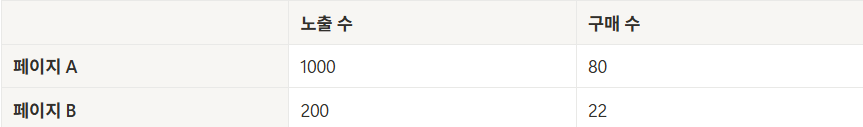

## 문제9

- 결과를 바탕으로 패키지 기획자는 페이지 B의 효과에 대해 어떤 결정을 해야 할지 서술해 주세요.
- Hint) https://abtestguide.com/calc/  를 사용하여 해석해보세요

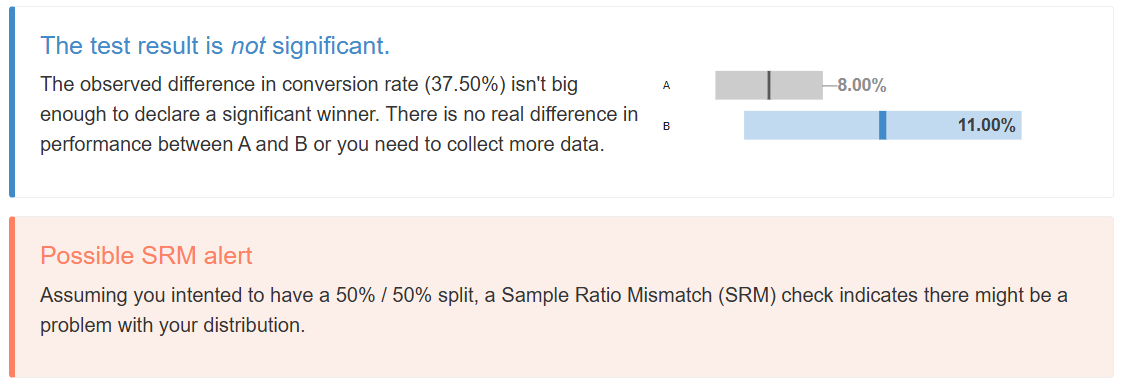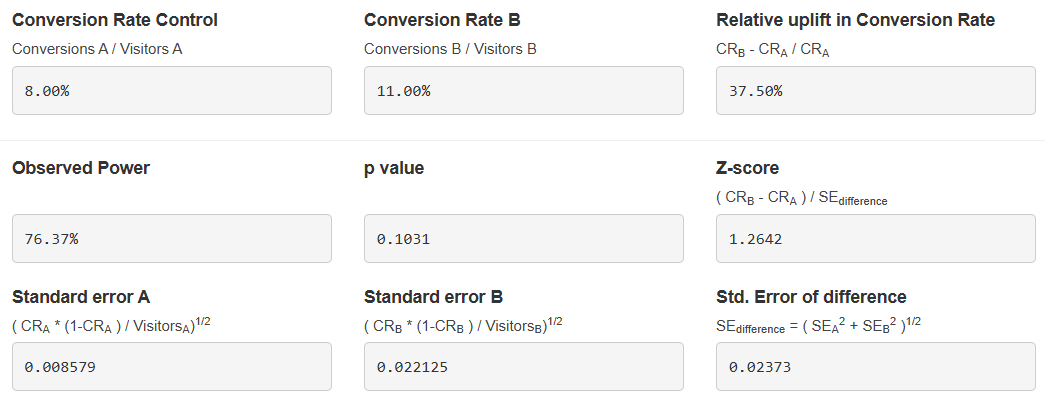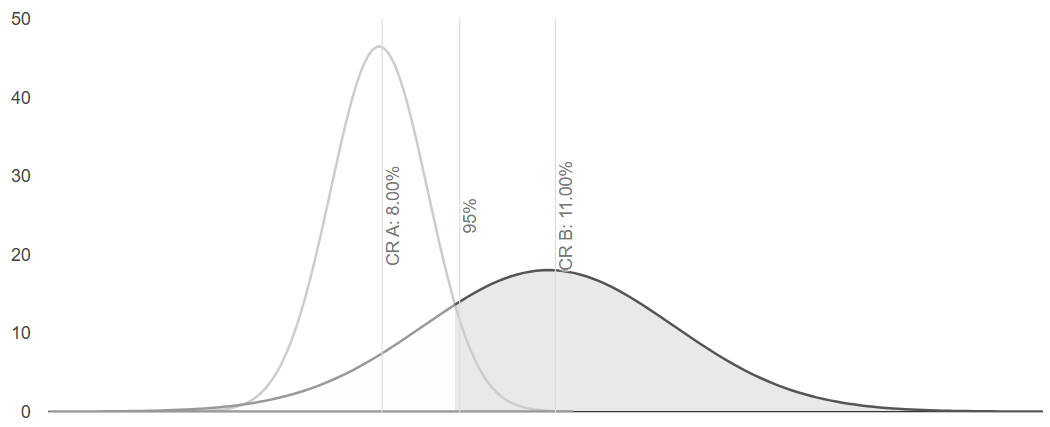

출처: https://abtestguide.com/calc/?ua=1000&ub=200&ca=80&cb=22

A/B테스트 결과를 바탕으로 패키지 기획자는 페이지A에서 페이지B로 전환하는 것이 효과적이지 않다라고 결론 내리거나, 또는 페이지B의 효과를 검증하기 위해 표본의 크기가 다소 작다는 결론에 이르게 됩니다.
그러므로 테스트를 재설계하여 페이지A, 페이지B에 대해 데이터를 추가로 수집하거나 다른 분석기법을 적용하여 기존 데이터의 통계량을 보다 다양한 각도에서 해석해보는 방안을 고려해볼 수 있습니다.



1.   **베이지안 테스트** 수행 후 A/B 테스트 결과 비교검토
* A/B 테스트만 진행할 경우에는 샘플 데이터 편향에 의한 잘못된 결정을 내릴 가능성을 내포하고 있으며, 결과 해석 시 특정 기준을 만족하면 유의미하다고 비교적 경직된 방법으로 결과를 해석합니다.
* 베이지만 테스트를 수행 시에는 대안을 선택할 시에는 원본보다 몇 퍼센트의 개선이 이루어지는지, 몇 퍼센트의 손실이 예상되는지 등의 사후확률 분석 결과를 제공합니다.
* 자료 출처: https://yozm.wishket.com/magazine/detail/1034/



## 문제10

- A/B 테스트의 결과가 통계적으로 유의하나 효과의 차이 자체는 매우 작은 경우, 어떤 의사결정을 할 수 있을지 사례를 통해 설명해 주세요.
- Hint) A/B 관련 자료를 찾아보세요(추천 문헌 [요즘IT](https://yozm.wishket.com/))

A/B 테스트의 결과가 통계적으로 유의하나 효과의 차이 자체가 매우 작다면, 이는 우리가 통계적으로는 차이를 발견했지만, 실제로는 그 차이가 현실적으로 중요하지 않을 수 있다는 것을 의미합니다. 이 경우에는 추가적인 고려가 필요합니다. 처음으로는 결과의 통계적 유의성 외에도 실제적인 비즈니스 영향을 고려해야 합니다. 그 차이가 회사의 목표에 미치는 영향이 실질적으로 중요한지를 고려해 보고, 만약 그렇다면 조치를 취할 필요가 있을 것입니다. 또한, 이러한 상황에서는 실험 설계나 변수 수정 등 추가적인 분석을 통해 결과를 더 깊이 이해하는 것이 중요할 것입니다. 실험의 결과가 유의하더라도 효과의 크기가 작을 때는 결정을 내리기 전에 신중한 검토가 필요합니다.    


(출처:https://yozm.wishket.com/magazine/questions/share/6HwMch1rTlJKgevM/)



*   비즈니스 영향 분석 사례

비즈니스 영향을 결론적으로 검증된 효과이가 차이가 비록 작아 보여도, 실제로 성과에 어느 정도의 의미를 갖는지 보다 구체적으로 비교해보는 것을 의미한다.
가령, 한 회사의 홈페이지의 전환율 분석을 한다고 하자. 테스트 기간동안 페이지별로 방문고객수 100,000명을 대상으로 A/B테스트를 진행했을 때 페이지B가 통계적 1%p의 전환율 차이가 검증됐다고 하자. 전활율이 1%p 상향할 때 추가로 유입되는 고객의 수는 1,000명이고, 고객의 평균 객단가가 10만원이라면 1%p의 전환율 향상은 결국 10억원의 매출액 향상으로 이어진다는 결론에 이르게 된다.
반면 방문고객수 1,000명을 대상으로 동일 테스트를 진했을 때, 1$p의 전환율 차이는 10명의 고객을 추가로 확보할 수 있다는 말이고, 결국 매출액이 100만원 향상될 것이라는 결론에 이르게 된다. 이처럼 A/B 테스트의 결과가 통계적으로 유의하나 효과의 차이가 작은 경우에는 비지니스 목표에 부합하는지 검토 후 의사결정에 반영하는 것이 바람직하다.

사례 출처:https://yozm.wishket.com/magazine/detail/1680/